# Movie Genre Classification 

**We are going to predict the genre of the movie based on the plot/summary of the film.**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords# to remove stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [3]:
#our data is separated by ::: there's also \n for new lines 
df_train = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
df_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [4]:
print(df_train.info())
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>

Index: 54214 entries, 1 to 54214

Data columns (total 3 columns):

 #   Column       Non-Null Count  Dtype 

---  ------       --------------  ----- 

 0   Title        54214 non-null  object

 1   Genre        54214 non-null  object

 2   Description  54214 non-null  object

dtypes: object(3)

memory usage: 1.7+ MB

None

Title          0

Genre          0

Description    0

dtype: int64


# Explanatory Data Analysis

**I tried checking which genre of movies are the most produced.**

<Axes: title={'center': 'Genre Count in the Dataset'}, xlabel='Genre', ylabel='Count'>

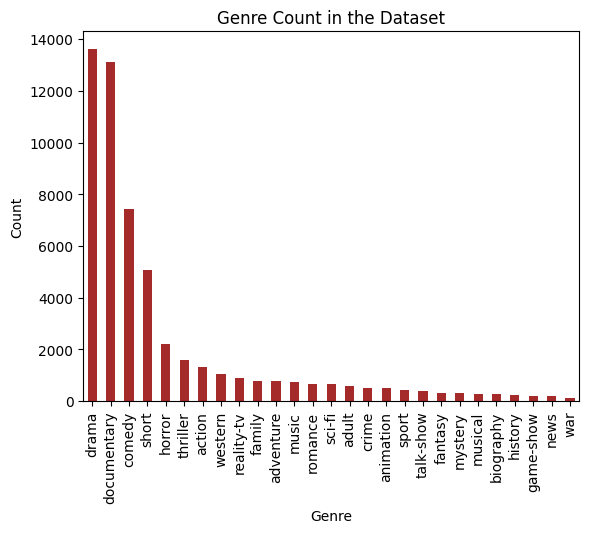

In [5]:
genre_cnt = df_train["Genre"].value_counts()
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Count in the Dataset")
genre_cnt.plot(kind='bar',color='brown')

**I found that 'drama', 'documentary' and 'comedy' were the most popular genres**

**I also tried checking if there was some relation between the title length of the movie and its corresponding genre**

Text(0.5, 1.0, 'Title length distribution')

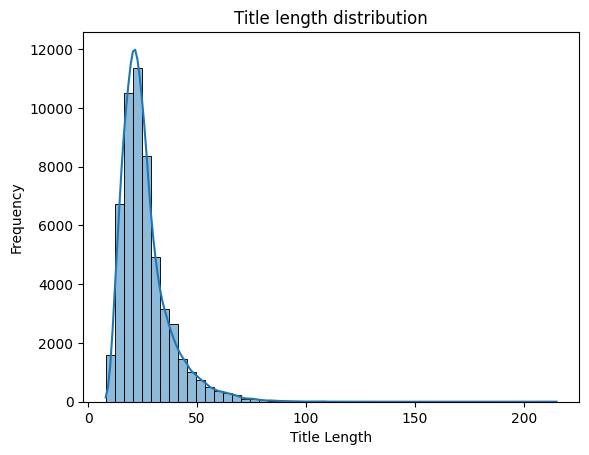

In [6]:
#genre and title length correlation
df_train['title_length'] = df_train['Title'].apply(len)
#popular title lengths
sns.histplot(data=df_train,x='title_length',bins=50,kde=True)
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.title("Title length distribution")
#20 is popular

# **TEXT PREPROCESSING**

The main focus here is to clean and prepare our data set for further processing. I focused on the plot description since we predict on the basis of plot.

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...

[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...

Archive:  /kaggle/working/corpora/wordnet.zip

   creating: /kaggle/working/corpora/wordnet/

  inflating: /kaggle/working/corpora/wordnet/lexnames  

  inflating: /kaggle/working/corpora/wordnet/data.verb  

  inflating: /kaggle/working/corpora/wordnet/index.adv  

  inflating: /kaggle/working/corpora/wordnet/adv.exc  

  inflating: /kaggle/working/corpora/wordnet/index.verb  

  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  

  inflating: /kaggle/working/corpora/wordnet/data.adj  

  inflating: /kaggle/working/corpora/wordnet/index.adj  

  inflating: /kaggle/working/corpora/wordnet/LICENSE  

  inflating: /kaggle/working/corpora/wordnet/citation.bib  

  inflating: /kaggle/working/corpora/wordnet/noun.exc  

  inflating: /kaggle/working/corpora/wordnet/verb.exc  

  inflating: /kaggle/working/corpora/wordnet/README  

  inflating: /kaggle/working/corpora/wordnet/index.sense  

  inflating: /kaggle/working/corp

Imported NLTK for stopwords and lemmatization purposes.

Here, I have used a separate function which does all the stuff from converting plot text to lowercase, removing every non-alphabetic characters except space, removing stopwords and lastly lemmatization to reduce words in their base forms.

In [9]:
lemmatizer = WordNetLemmatizer()

stopwords_set = set(stopwords.words('english'))
def text_prep(text):
    c_text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    c_text = c_text.lower()
    tokens = c_text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
    return " ".join(tokens)
df_train['Description']=df_train['Description'].apply(text_prep)
df_train

,Title,Genre,Description,title_length
1,Oscar et la dame rose (2009),drama,listening conversation doctor parent yearold o...,28
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,12
3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...,32
4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...,21
5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...,22
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,shortlived nbc live sitcom centered bonino wor...,15
54211,Dead Girls Don't Cry (????),horror,next generation exploitation sister kapa bay s...,27
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt standup comedy growing facing ...,41
54213,Make Your Own Bed (1944),comedy,walter vivian live country difficult time keep...,24


# Term Frequency - Inverse Document Frequency (TF-IDF)

I used this statistical method to measure how important a word was within its plot relative to within all the movie plots.It assigns higher values to words that are unique to specific movies while downweighting common words.

In [10]:
v = TfidfVectorizer()
transformed_output=v.fit_transform(df_train['Description'])

Firstly, we split the training data into further training and test data 8:2

In [11]:
from sklearn.model_selection import train_test_split
y=df_train["Genre"]
X=transformed_output
X_train, X_test, y_train,y_test = train_test_split(
X,y,test_size=0.2,random_state=1)

NOW, we move towards different ensembling models. We will use the model with the higher accuracy for our actual test cases.

# Random Forest Classifier

Using TF-IDF-transformed features it predicts the genre of movies combining multiple decision tress.

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf= rf.predict(X_test)
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print(f"Accuracy of train : {accuracy_train_rf}")
print(f"Accuracy of test : {accuracy_test_rf}")

Accuracy of train : 0.9995388623734753

Accuracy of test : 0.4819699345199668
